In [52]:
import pandas as pd
import numpy as np
#-*- coding: utf-8 -*-
time= pd.read_csv('시간별유동',index_col=0)
ppl=pd.read_csv('성별유동',index_col=0)

In [3]:
time.reset_index(level=0, inplace=True)

In [53]:
ppl.reset_index(level=0, inplace=True)

In [54]:
for i in range(2,18):
    ppl.columns.values[i]=ppl.columns.values[i].replace("MAN_FLOW_POP_CNT",'남_유동')
        
for i in range(18,33):
    ppl.columns.values[i]=ppl.columns.values[i].replace("WMAN_FLOW_POP_CNT",'여_유동')  

In [55]:
def gather( df, key, value, cols ):
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt( df, id_vars, id_values, var_name, value_name )

In [7]:
time=gather( time, 'hour', 'population', ['TMST_00','TMST_01','TMST_02','TMST_03','TMST_04','TMST_05','TMST_06','TMST_07','TMST_08','TMST_09','TMST_10','TMST_11','TMST_12','TMST_13','TMST_14','TMST_15','TMST_16','TMST_17','TMST_18','TMST_19','TMST_20','TMST_21','TMST_22','TMST_23'] )

In [8]:
time['hour']=time['hour'].apply(lambda x : str(x).replace('TMST_',''))

In [9]:
time=pd.DataFrame(time,columns=['STD_YMD','hour','HDONG_CD','HDONG_NM','population'])

In [10]:
time1=time.copy()

In [11]:
time1

,STD_YMD,hour,HDONG_CD,HDONG_NM,population
0,20180401,00,1111051500,청운효자동,609.11
1,20180401,00,1111053000,사직동,1904.32
2,20180401,00,1111054000,삼청동,216.30
3,20180401,00,1111055000,부암동,1300.61
4,20180401,00,1111056000,평창동,2523.88
5,20180401,00,1111057000,무악동,332.06
6,20180401,00,1111058000,교남동,528.17
7,20180401,00,1111060000,가회동,258.39
8,20180401,00,1111061500,종로1.2.3.4가동,4078.65
9,20180401,00,1111063000,종로5.6가동,1350.90


In [13]:
time1.to_csv('시간대별 유동인구(미세먼지 시간대별과 ).csv',encoding='utf-8')

In [12]:
time.groupby(['STD_YMD',"hour", "HDONG_NM"]).mean().sort_values('population',ascending=False)

HDONG_CD  population
STD_YMD  hour HDONG_NM                           
20181105 12   종로1.2.3.4가동  1111061500   128551.69
         13   종로1.2.3.4가동  1111061500   117076.92
20180510 08   종로1.2.3.4가동  1111061500    91540.99
20180515 08   종로1.2.3.4가동  1111061500    91422.59
20180427 08   종로1.2.3.4가동  1111061500    90452.50
20180529 08   종로1.2.3.4가동  1111061500    90036.19
20180511 08   종로1.2.3.4가동  1111061500    90015.06
20180509 08   종로1.2.3.4가동  1111061500    89863.82
20180523 08   종로1.2.3.4가동  1111061500    89413.84
20180405 08   종로1.2.3.4가동  1111061500    89344.68
20180417 08   종로1.2.3.4가동  1111061500    89327.04
20180418 08   종로1.2.3.4가동  1111061500    89238.37
20180514 08   종로1.2.3.4가동  1111061500    89237.26
20180712 08   종로1.2.3.4가동  1111061500    89130.66
20180518 08   종로1.2.3.4가동  1111061500    89113.16
20180426 08   종로1.2.3.4가동  1111061500    89065.79
20180502 08   종로1.2.3.4가동  1111061500    89036.42
20180508 08   종로1.2.3.4가동  1111061500    88980.48
20180528 08   종로1.2.3.4가동  1111061500    88753.99
20180425 08   종로1.2.3.4가동  1111061500    88572.10
20180504 08   종로1.2.3.4가동  1111061500    88492.35
20180416 08   종로1.2.3.4가동  1111061500    88398.67
20180705 08   종로1.2.3.4가동  1111061500    88397.46
20180531 08   종로1.2.3.4가동  1111061500    87752.71
20180530 08   종로1.2.3.4가동  1111061500    87697.53
20180419 08   종로1.2.3.4가동  1111061500    87674.50
20180403 08   종로1.2.3.4가동  1111061500    87622.50
20180409 08   종로1.2.3.4가동  1111061500    87592.82
20180517 08   종로1.2.3.4가동  1111061500    87439.04
20180410 08   종로1.2.3.4가동  1111061500    87399.27
...                               ...         ...
20190110 16   상계5동         1135067000        0.00
              상계3.4동       1135066500        0.00
              종로5.6가동      1111063000        0.00
              중계1동         1135062100        0.00
              중계2.3동       1135062500        0.00
              중계4동         1135062400        0.00
         17   상계1동         1135063000        0.00
              상계10동        1135072000        0.00
              삼청동          1111054000        0.00
              사직동          1111053000        0.00
              부암동          1111055000        0.00
              무악동          1111057000        0.00
20190125 06   중계본동         1135061900        0.00
20190110 17   교남동          1111058000        0.00
              공릉2동         1135060000        0.00
              공릉1동         1135059500        0.00
              가회동          1111060000        0.00
         16   혜화동          1111065000        0.00
              하계2동         1135061200        0.00
              하계1동         1135061100        0.00
              평창동          1111056000        0.00
20190125 06   창신1동         1111067000        0.00
20190110 16   청운효자동        1111051500        0.00
              창신3동         1111069000        0.00
              창신2동         1111068000        0.00
              창신1동         1111067000        0.00
20190125 06   창신2동         1111068000        0.00
20190110 16   중계본동         1135061900        0.00
20190125 06   창신3동         1111069000        0.00
              상계10동        1135072000        0.00

[315360 rows x 2 columns]

In [65]:
ppl.columns.values[17]

'MAN_FLOW_POP_CNT_70U'

In [56]:
ppl=gather(ppl,'성연령','population',['남_유동_0004','남_유동_0509','남_유동_1014','남_유동_1519','남_유동_2024','남_유동_2529','남_유동_3034','남_유동_3539','남_유동_4044','남_유동_4549','남_유동_5054','남_유동_5559','남_유동_6064','남_유동_6569','남_유동_70U','여_유동_0004','여_유동_0509','여_유동_1014','여_유동_1519','여_유동_2024','여_유동_2529','여_유동_3034','여_유동_3539','여_유동_4044','여_유동_4549','여_유동_5054','여_유동_5559','여_유동_6064','여_유동_6569','여_유동_70U'])

In [57]:
ppl

,STD_YMD,HDONG_CD,HDONG_NM,성연령,population
0,20180401,1135070000,상계8동,남_유동_0004,0.00
1,20180401,1135057000,월계2동,남_유동_0004,0.00
2,20180401,1135058000,월계3동,남_유동_0004,0.00
3,20180401,1135059500,공릉1동,남_유동_0004,0.00
4,20180401,1135060000,공릉2동,남_유동_0004,0.00
5,20180401,1135061100,하계1동,남_유동_0004,0.00
6,20180401,1135061200,하계2동,남_유동_0004,0.00
7,20180401,1135061900,중계본동,남_유동_0004,0.00
8,20180401,1135062100,중계1동,남_유동_0004,0.00
9,20180401,1135062400,중계4동,남_유동_0004,0.00


In [7]:
ppl.head()

,STD_YMD,HDONG_CD,HDONG_NM,성연령,population
0,20180401,1135070000,상계8동,남_유동_0004,0.0
1,20180401,1135057000,월계2동,남_유동_0004,0.0
2,20180401,1135058000,월계3동,남_유동_0004,0.0
3,20180401,1135059500,공릉1동,남_유동_0004,0.0
4,20180401,1135060000,공릉2동,남_유동_0004,0.0


In [58]:
ppl['성'][197098:197101]

KeyError: '성'

In [60]:
ppl['성']='남'

In [61]:
ppl['성'][197100:]='여'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
ppl['성연령']=ppl['성연령'].apply(lambda x: x.split('유동_',1)[1])

In [63]:
ppl=ppl.rename(columns={'성연령':'연령'})

In [64]:
ppl.sort_values('population',ascending=False).head(200)

,STD_YMD,HDONG_CD,HDONG_NM,연령,population,성
126136,20181105,1111061500,종로1.2.3.4가동,4549,60993.22,남
99856,20181105,1111061500,종로1.2.3.4가동,3539,60141.11,남
119483,20180504,1111061500,종로1.2.3.4가동,4549,57982.83,남
119725,20180511,1111061500,종로1.2.3.4가동,4549,56865.33,남
93203,20180504,1111061500,종로1.2.3.4가동,3539,56821.47,남
119699,20180510,1111061500,종로1.2.3.4가동,4549,56638.39,남
119186,20180426,1111061500,종로1.2.3.4가동,4549,56209.32,남
121967,20180712,1111061500,종로1.2.3.4가동,4549,55888.86,남
119150,20180425,1111061500,종로1.2.3.4가동,4549,55755.57,남
119222,20180427,1111061500,종로1.2.3.4가동,4549,55714.97,남


In [65]:
ppl.head()

,STD_YMD,HDONG_CD,HDONG_NM,연령,population,성
0,20180401,1135070000,상계8동,0004,0.0,남
1,20180401,1135057000,월계2동,0004,0.0,남
2,20180401,1135058000,월계3동,0004,0.0,남
3,20180401,1135059500,공릉1동,0004,0.0,남
4,20180401,1135060000,공릉2동,0004,0.0,남


In [34]:
ppl[:26280].groupby(['STD_YMD',"연령", "HDONG_NM",'HDONG_CD','성']).sum().groupby(level=[0]).cumsum()

population
STD_YMD  연령   HDONG_NM    HDONG_CD   성            
20180401 0004 가회동         1111060000 남        0.00
              공릉1동        1135059500 남        0.00
              공릉2동        1135060000 남        0.00
              교남동         1111058000 남        0.10
              무악동         1111057000 남        0.28
              부암동         1111055000 남        0.28
              사직동         1111053000 남        1.53
              삼청동         1111054000 남        1.53
              상계10동       1135072000 남        1.54
              상계1동        1135063000 남        1.54
              상계2동        1135064000 남        1.54
              상계3.4동      1135066500 남        1.54
              상계5동        1135067000 남        1.54
              상계6.7동      1135069500 남        1.54
              상계8동        1135070000 남        1.54
              상계9동        1135071000 남        1.54
              숭인1동        1111070000 남        1.54
              숭인2동        1111071000 남        1.56
              월계1동        1135056000 남        1.56
              월계2동        1135057000 남        1.56
              월계3동        1135058000 남        1.56
              이화동         1111064000 남        1.56
              종로1.2.3.4가동 1111061500 남        1.56
              종로5.6가동     1111063000 남        1.56
              중계1동        1135062100 남        1.56
              중계2.3동      1135062500 남        1.56
              중계4동        1135062400 남        1.56
              중계본동        1135061900 남        1.56
              창신1동        1111067000 남        1.56
              창신2동        1111068000 남        1.56
...                                            ...
20190331 0509 사직동         1111053000 남     1548.48
              삼청동         1111054000 남     1620.74
              상계10동       1135072000 남     1704.87
              상계1동        1135063000 남     2076.87
              상계2동        1135064000 남     2238.67
              상계3.4동      1135066500 남     2379.79
              상계5동        1135067000 남     2445.37
              상계6.7동      1135069500 남     2970.61
              상계8동        1135070000 남     3136.19
              상계9동        1135071000 남     3207.36
              숭인1동        1111070000 남     3240.75
              숭인2동        1111071000 남     3367.16
              월계1동        1135056000 남     3505.82
              월계2동        1135057000 남     3614.95
              월계3동        1135058000 남     3894.25
              이화동         1111064000 남     3998.59
              종로1.2.3.4가동 1111061500 남     4619.69
              종로5.6가동     1111063000 남     4776.14
              중계1동        1135062100 남     4911.55
              중계2.3동      1135062500 남     5126.42
              중계4동        1135062400 남     5232.29
              중계본동        1135061900 남     5371.79
              창신1동        1111067000 남     5463.61
              창신2동        1111068000 남     5485.67
              창신3동        1111069000 남     5507.60
              청운효자동       1111051500 남     5623.13
              평창동         1111056000 남     5998.08
              하계1동        1135061100 남     6163.07
              하계2동        1135061200 남     6275.06
              혜화동         1111065000 남     6400.54

[26280 rows x 1 columns]

In [179]:
ppl['연령'][:26280]='0009'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
ppl[(ppl['HDONG_NM']=='가회동')&(ppl['STD_YMD']==20180401)]

,STD_YMD,HDONG_CD,HDONG_NM,연령,population,성
34,20180401,1111060000,가회동,0004,0.00,남
13174,20180401,1111060000,가회동,0509,37.87,남
26314,20180401,1111060000,가회동,1014,196.30,남
39454,20180401,1111060000,가회동,1519,535.94,남
52594,20180401,1111060000,가회동,2024,472.73,남
65734,20180401,1111060000,가회동,2529,893.54,남
78874,20180401,1111060000,가회동,3034,937.81,남
92014,20180401,1111060000,가회동,3539,1051.83,남
105154,20180401,1111060000,가회동,4044,856.70,남
118294,20180401,1111060000,가회동,4549,1095.21,남


In [214]:
ppl['연령'][197100:223380]='0009'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
ppl[197099:223381].groupby(['STD_YMD',"연령", "HDONG_NM",'HDONG_CD','성']).sum().groupby(level=[0]).cumsum().population

STD_YMD   연령    HDONG_NM     HDONG_CD    성
20180401  0004  가회동          1111060000  여       0.00
                공릉1동         1135059500  여       0.07
                공릉2동         1135060000  여       0.07
                교남동          1111058000  여       0.07
                무악동          1111057000  여       0.07
                부암동          1111055000  여       0.07
                사직동          1111053000  여       0.07
                삼청동          1111054000  여       0.07
                상계10동        1135072000  여       0.07
                상계1동         1135063000  여       0.07
                상계2동         1135064000  여       0.07
                상계3.4동       1135066500  여       0.07
                상계5동         1135067000  여       0.07
                상계6.7동       1135069500  여       0.07
                상계8동         1135070000  여       0.07
                상계9동         1135071000  여       0.07
                숭인1동         1111070000  여       0.07
                숭인2동         1111071000

In [238]:
ppl[197099:223381].groupby(['STD_YMD',"연령", "HDONG_NM",'HDONG_CD','성'],group_keys=False).sum().groupby(level=[0]).cumsum()

population
STD_YMD  연령   HDONG_NM    HDONG_CD   성            
20180401 0009 가회동         1111060000 여       46.75
              공릉1동        1135059500 여      488.64
              공릉2동        1135060000 여     1038.53
              교남동         1111058000 여     1131.61
              무악동         1111057000 여     1185.52
              부암동         1111055000 여     1438.07
              사직동         1111053000 여     1833.16
              삼청동         1111054000 여     1924.16
              상계10동       1135072000 여     2017.86
              상계1동        1135063000 여     2467.50
              상계2동        1135064000 여     2680.57
              상계3.4동      1135066500 여     2876.34
              상계5동        1135067000 여     3002.87
              상계6.7동      1135069500 여     3526.59
              상계8동        1135070000 여     3671.64
              상계9동        1135071000 여     3757.88
              숭인1동        1111070000 여     3799.76
              숭인2동        1111071000 여     3916.63
              월계1동        1135056000 여     4108.91
              월계2동        1135057000 여     4324.46
              월계3동        1135058000 여     4635.05
              이화동         1111064000 여     4760.45
              종로1.2.3.4가동 1111061500 여     5568.15
              종로5.6가동     1111063000 여     5728.74
              중계1동        1135062100 여     5893.85
              중계2.3동      1135062500 여     6244.07
              중계4동        1135062400 여     6385.91
              중계본동        1135061900 여     6509.56
              창신1동        1111067000 여     6612.29
              창신2동        1111068000 여     6629.20
...                                            ...
20190331 0009 삼청동         1111054000 여     2019.17
              상계10동       1135072000 여     2122.47
              상계1동        1135063000 여     2581.35
              상계2동        1135064000 여     2781.16
              상계3.4동      1135066500 여     2920.69
              상계5동        1135067000 여     3020.96
              상계6.7동      1135069500 여     3562.74
              상계8동        1135070000 여     3741.38
              상계9동        1135071000 여     3842.22
              숭인1동        1111070000 여     3882.92
              숭인2동        1111071000 여     4031.31
              월계1동        1135056000 여     4181.65
              월계2동        1135057000 여     4297.94
              월계3동        1135058000 여     4625.67
              이화동         1111064000 여     4770.53
              종로1.2.3.4가동 1111061500 여     5694.23
              종로5.6가동     1111063000 여     5887.79
              중계1동        1135062100 여     6043.89
              중계2.3동      1135062500 여     6309.53
              중계4동        1135062400 여     6450.87
              중계본동        1135061900 여     6586.08
              창신1동        1111067000 여     6696.00
              창신2동        1111068000 여     6723.71
              창신3동        1111069000 여     6744.42
              청운효자동       1111051500 여     6880.29
              평창동         1111056000 여     7310.26
              하계1동        1135061100 여     7539.33
              하계2동        1135061200 여     7702.95
              혜화동         1111065000 여     7891.50
         70U  상계10동       1135072000 남     9400.90

[13142 rows x 1 columns]

In [81]:
card=pd.read_csv('Card_Spending_190809.csv',index_col=0)

In [66]:
dictt={'0004':20,
 '0509':20,
 '1014':20,
 '1519':20,
 '2024':20,
 '2529':25,
 '3034':30,
 '3539':35,
 '4044':40,
 '4549':45,
 '5054':50,
 '5559':55,
 '6064':60,
 '6569':65,
 '70U':65}

In [67]:
ppl['나이코드']=ppl['연령'].apply(lambda x:dictt[x])

In [70]:
ppl['STD_YMD']=pd.to_datetime(ppl['STD_YMD'].astype('str'))

In [76]:
ppl.rename( columns={'HDONG_NM':'행정동코드','STD_YMD':'기준일자','성':'성별코드'},inplace=True)

In [86]:
card.head()

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액(천원)
0,2018-04-01,종로구,청운효자동,레저업소,여,30,4,180
1,2018-04-01,종로구,청운효자동,레저업소,여,55,4,22
2,2018-04-01,종로구,청운효자동,레저업소,남,20,35,184
3,2018-04-01,종로구,청운효자동,레저업소,남,25,70,425
4,2018-04-01,종로구,청운효자동,레저업소,남,30,18,82


In [87]:
card['기준일자']=pd.to_datetime(card['기준일자'])

In [89]:
len(card)

2152963

In [90]:
len(ppl)

394200

In [94]:
card_population=card.merge(ppl,on=['기준일자','행정동코드','성별코드','나이코드'],how='left')

In [95]:
card_population.to_csv('card_population.csv',encoding='utf-8')

In [3]:
import pandas as pd
a=pd.read_csv('card_population.csv',index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
%matplotlib notebook
import pandas
import matplotlib

In [5]:
a['건당결제금액(원)'].astype('int')=a['이용금액(천원)']*1000/a['이용건수']

SyntaxError: can't assign to function call (<ipython-input-5-b548cf31f418>, line 1)

In [6]:
a['건당결제금액(원)']=a['건당결제금액(원)'].astype('int')

<IPython.core.display.Javascript object>


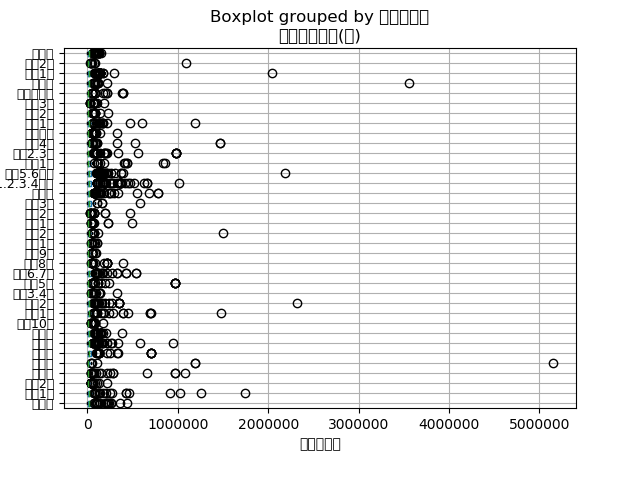

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]), <a list of 36 Text yticklabel objects>)

In [10]:
import matplotlib.pyplot as plt
a[a['기준일자']=='2018-04-01'].boxplot(column='건당결제금액(원)',return_type='dict',by='행정동코드',vert=False)
plt.rc('font', family='NanumGothic')
matplotlib.pyplot.yticks(fontsize=9)

In [23]:
a.head()

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액(천원),HDONG_CD,연령,population,건당결제금액(원)
0,2018-04-01,종로구,청운효자동,레저업소,여,30,4,180,1111051500,3034,1356.08,45000
1,2018-04-01,종로구,청운효자동,레저업소,여,55,4,22,1111051500,5559,1433.06,5500
2,2018-04-01,종로구,청운효자동,레저업소,남,20,35,184,1111051500,0004,0.05,5257
3,2018-04-01,종로구,청운효자동,레저업소,남,20,35,184,1111051500,0509,78.93,5257
4,2018-04-01,종로구,청운효자동,레저업소,남,20,35,184,1111051500,1014,403.26,5257


In [ ]:

for i in range(0, len(a.columns), 5):
    sns.pairplot(data=a,
                x_vars=a.columns[i:i+5],
                y_vars=['건당결제금액(원)'])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000000009AF4048> (for post_execute):

<IPython.core.display.Javascript object>


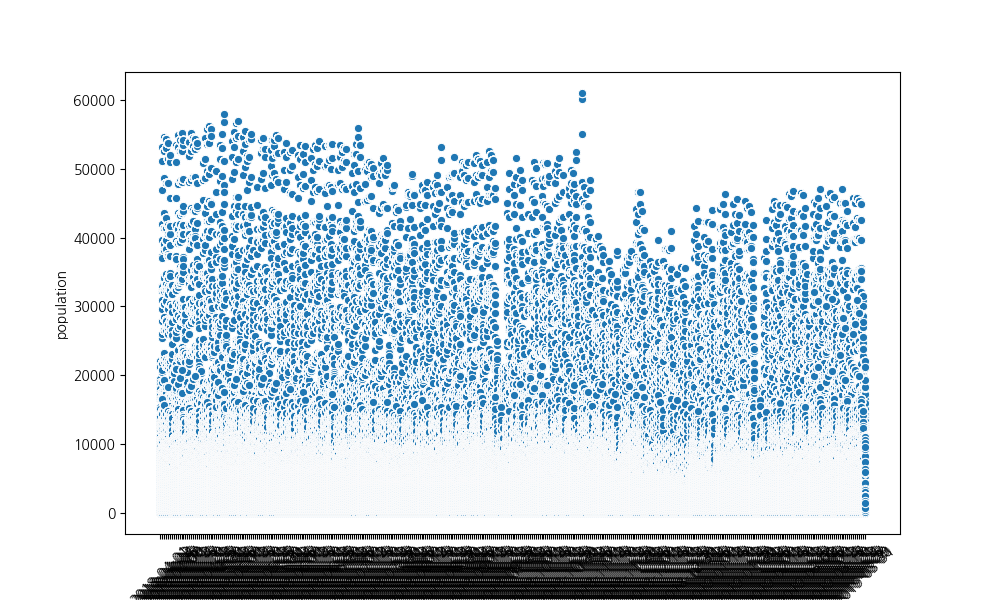

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [24]:
import seaborn as sns
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x='기준일자', y='population', data=a)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [25]:
a

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액(천원),HDONG_CD,연령,population,건당결제금액(원)
0,2018-04-01,종로구,청운효자동,레저업소,여,30,4,180,1111051500,3034,1356.08,45000
1,2018-04-01,종로구,청운효자동,레저업소,여,55,4,22,1111051500,5559,1433.06,5500
2,2018-04-01,종로구,청운효자동,레저업소,남,20,35,184,1111051500,0004,0.05,5257
3,2018-04-01,종로구,청운효자동,레저업소,남,20,35,184,1111051500,0509,78.93,5257
4,2018-04-01,종로구,청운효자동,레저업소,남,20,35,184,1111051500,1014,403.26,5257
5,2018-04-01,종로구,청운효자동,레저업소,남,20,35,184,1111051500,1519,642.66,5257
6,2018-04-01,종로구,청운효자동,레저업소,남,20,35,184,1111051500,2024,984.24,5257
7,2018-04-01,종로구,청운효자동,레저업소,남,25,70,425,1111051500,2529,1792.30,6071
8,2018-04-01,종로구,청운효자동,레저업소,남,30,18,82,1111051500,3034,1936.10,4555
9,2018-04-01,종로구,청운효자동,레저업소,남,35,4,44,1111051500,3539,2060.54,11000


In [26]:
a.columns

Index(['기준일자', '구코드', '행정동코드', '업종코드', '성별코드', '나이코드', '이용건수', '이용금액(천원)',
       'HDONG_CD', '연령', 'population', '건당결제금액(원)'],
      dtype='object')

In [29]:
news=pd.read_csv('sns_full_sample(1000).csv')

In [51]:
import string
lines=[]
for i in range(50):
    lines=news.content[i].split(' ')
    for each_line in lines:
        if each_line.contain('종로구'):
            print(each_line)
       

AttributeError: 'str' object has no attribute 'contain'

In [55]:
import re
for i in range(50):
    if re.compile(r'종로구').search(news.content[i]):
        print(news.content[i])


TypeError: expected string or bytes-like object

In [99]:
news.content.str.extract(pat = '(제공|소정|원고료|포스팅은|)').dropna()

,0
21,제공
24,제공
28,제공
31,제공
37,제공
50,제공
51,제공
64,제공
71,제공
76,제공


In [104]:
news.content.str.extract(pat = '(로하셀)').dropna().index

Int64Index([3, 42, 69, 74, 223, 362, 366, 420, 610, 652, 678, 688, 818, 896,
            942],
           dtype='int64')

In [109]:
news.content[10]

'건강에 관심이 많은 사람들이라면 미세먼지 초미세먼지 환절기 등은 그리 달갑지 않은 단어들이다 축산도 예외는 아니다 지름이 10마이크로미터 이하인 미세먼지는 일반적으로 수도권의 경우 10월 가을부터 수치가 올라가다가 매년 1 2월에 정점을 찍는 모습을 보인다 보통 미세먼지가 시작되는 시기는 10월 말인데 올해는 10월 중순부터 벌써 영향을 주고 있다 특히 사람은 물론 소 돼지 등 가축에 있어서 각종 호흡기 질환을 일으키는 직접적인 원인이 되는 지름 25마이크로미터 이하인 초미세먼지의 경우는 중국의 영향이 가장 크다고 한다 아프리카돼지열병이 좀처럼 숙지지 않고 지난 16일 오전 9시를 기해 28건이 발생중인 중국의 상황은 환절기를 맞아 이래저래 우리나라 축산에 있어 문제가 아닐 수 없다\xa0 농촌진흥청 축산과학원은 환절기 건조한 공기가 소 코의 점막을 마르게 해 병원체가 체내에 들어오기 쉬운 환경이 되고 체온 유지로 스트레스는 늘고 면역력은 떨어져 소의 질병 발생이 증가한다고 한다 미세먼지 등이 가축 몸 안으로 들어오면 폐렴 등 호흡기 질병과 결막염 같은 안구질환을 일으킬 수 있어 각별한 주의가 필요한 것이다 농가에선 미세먼지 등이 발생하면 가축을 축사 안으로 이동시키고 출입문과 환기창을 닫아 외부 공기와의 접촉을 줄여주는 한편 미세먼지 등에 노출됐을 경우 몸에서 이물질을 털어낸 뒤 구연산 소독제 등을 이용해 분무기로 소독하고 이후 1∼2주일간은 건강 상태를 세심하게 관찰해야 한다 가축의 생산성 하락을 막고 호흡기 질병 등을 예방하기 위해 미세먼지와 초미세먼지에 대한 대비를 보다 철저히 해야 하는 시즌이 축산농가들에게 또 돌아왔다 \xa0 홍정민 기자\xa0\xa0smart73aflnewscokr 저작권자 © 농수축산신문 무단 전재 및 재배포 금지'

In [113]:
news.content[20]

'뷰\u3000 \u3000티 스킨케어  상큼한 청귤 수분감이 가득 구달 에멀전  미스트 한달 사용리뷰 올리브영 추천제품 희스토리  2019 2 20 2036 URL 복사 이웃추가 본문 기타 기능 번역보기 \u200b \u200b \u200b \u200b구달 에멀전미스트 한달 사용기 \u200b 올리브영세일 기간에 득템한 구달 청귤 에멀전미스트 기획 세트 원래는 에멀전이 떨어져서 구입하려했는데  마침 미스트도 같이 주는 기획 세트를 발견했어요 ˃̵ ᴗ ˂ و \u200b \u200b \u200b \u200b \u200b \u200b \u200b \u200b \u200b \u200b \u200b \u200b 디테일샷 Detail shot ｜ 구달 청귤 에멀전미스트 12800할인가 포스팅기준220일 지금도 올리브영에서 할인가로 판매하고 있으며 정가는 16000원이에요 꽤 할인율이 높죠 ⚆ᴥ⚆ \u200b \u200b \u200b \u200b \u200b \u200b \u200b \u200b \u200b 구달 청귤 에멀전의 주 효과는 생기수분  산뜻한 사용감  그리고 저자극 \u200b 민감성 피부를 가진 저에게는 저자극의 순한 구달 제품이 꽤 잘 맞았어요 트러블도 없고 순한 제품이란걸 느낄수 있었죠 ᴗ͈ ˬ ᴗ͈ \u200b \u200b \u200b \u200b \u200b \u200b \u200b \u200b 제품디자인 Product Design 단점이라하면 용기 디자인 \u200b 에멀전은 펌핑형태가 아니어서 퍽퍽 손등에 때려서 써야했어요 손등 빨개짐주의 •́ ̯•̀ \u200b 미스트는 분사력은 나쁘진 않았으나 뭔가 샘플 용기같은 느낌이랄까 견고하지 못한 그립감이 조금 아쉬웠네요 역시 추가 증정품이라 그런가 싶기도 \u200b \u200b \u200b \u200b \u200b \u200b \u200b \u200b 성분 Ingredients 화해 캡쳐 민감성 피부를 위해 성분을 안살펴 볼수가 없죠 미스트의 경우 빅데이터 분석에도 트러블진정 촉촉한 저자극 이라는

In [2]:
import pandas as pd
env=pd.read_csv('유동인구_환경기상_hour.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 4: invalid start byte